In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from v1dd_public import ARTIFACT_DIR
import seaborn as sns


In [2]:
mouse_colors = {'slc2': "#66CCEE", 'slc4': "#228833", 'slc5': '#CCBB44', 'teto1': '#EE6677'}
mice = ['slc2', 'slc4', 'slc5', 'teto1']
mouse_ids = ["M409828", "M416296", "M427836", "M438833"]
z_groups_high_to_low = [[575, 600, 625], [650, 675, 700, 725], [500, 525, 550], [482, 498, 514], [434, 450, 466], \
    [386, 402, 418], [338, 354, 370], [290, 306, 322], [242, 258, 274], [194, 210, 226], [146, 162, 178], [98, 114, 130], [50, 66, 82]]
z_groups_low_to_high = [[50, 66, 82], [98, 114, 130], [146, 162, 178], [194, 210, 226], [242, 258, 274], [290, 306, 322], [338, 354, 370], \
    [386, 402, 418], [434, 450, 466], [482, 498, 514], [500, 525, 550], [575, 600, 625], [650, 675, 700, 725]]

z_groups_high_to_low = [[50], [66], [82], [98], [114], [130], [146], [162], [178], [194], [210], [226], \
    [242], [258], [274], [290], [306], [322], [338], [354], [370], [386], [402], [418], \
    [434], [450], [466], [482], [498], [514], [500], [525], [550], [575], [600], [625], \
    [650], [675], [700], [725]]
z_groups_low_to_high = [[50], [66], [82], [98], [114], [130], [146], [162], [178], [194], [210], [226], \
    [242], [258], [274], [290], [306], [322], [338], [354], [370], [386], [402], [418], \
    [434], [450], [466], [482], [498], [514], [500], [525], [550], [575], [600], [625], \
    [650, 675, 700, 725]]

In [3]:
stim_types = [
    "drifting_gratings_full", 
    "drifting_gratings_windowed", 
    "natural_images_12", 
    "natural_images"
    ]
decode_dims = {
    "drifting_gratings_full": ["direction", "spatial"],
    "drifting_gratings_windowed": ["direction", "spatial"],
    "natural_images_12": ["image_index"],
    "natural_images": ["image_index"]
               }
repetitions = 1000

chance = {
    "drifting_gratings_full_direction": 1/12, 
    "drifting_gratings_full_spatial": 1/2, 
    "drifting_gratings_full_direction_spatial": 1/24, 
    "drifting_gratings_windowed_direction": 1/12, 
    "drifting_gratings_windowed_spatial": 1/2, 
    "drifting_gratings_windowed_direction_spatial": 1/24, 
    "natural_images_12_image_index": 1/12,
    "natural_images_image_index": 1/118}

depth_mapping = {
    66: [50, 66, 82],
    114: [98, 114, 130], 
    162: [146, 162, 178],
    210: [194, 210, 226],
    258: [242, 258, 274],
    306: [290, 306, 322],
    354: [338, 354, 370],
    402: [386, 402, 418],
    450: [434, 450, 466],
    498: [482, 498, 514]
}

depths = [66,
    114, 
    162,
    210,
    258,
    306,
    354,
    402,
    450,
    498]

In [4]:
def depth_volume_mapping(a, b):
    depth_values = {
        1: {1: 66, 4: 114},
        2: {1: 162, 4: 210},
        3: {1: 258, 4: 306},
        4: {1: 354, 4: 402},
        5: {1: 450, 4: 498},
    }

    return depth_values[a][b[1]]

def depth_volume_mapping_2(volume_id, plane):
    depth_values = {
            1: [50, 66, 82, 98, 114, 130],
            2: [146, 162, 178, 194, 210, 226],
            3: [242, 258, 274, 290, 306, 322],
            4: [338, 354, 370, 386, 402, 418],
            5: [434, 450, 466, 482, 498, 514],
            6: [500],
            7: [525],
            8: [550],
            9: [575],
            'a': [600],
            'b': [625],
            'c': [650],
            'd': [675],
            'e': [700],
            'f': [725]
        }
    
    return depth_values[volume_id][plane - 1]


In [5]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0724_3"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot30_Rep1000')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)

In [6]:
all_results_df

,mouse_id,column_id,volume_id,plane,repetition_num,test_accuracies,test_accuracies_mean,test_accuracies_std,shuf_test_accuracies,shuf_test_accuracies_mean,shuf_test_accuracies_std,num_k_neighbors,shuf_num_k_neighbors,stim_type,decode_dim,depth
0,427836,3,2,5,0,"[0.07692307692307693, 0.1794871794871795, 0.07...",0.103914,0.039213,"[0.07692307692307693, 0.1794871794871795, 0.10...",0.119703,0.041791,3,11,drifting_gratings_full,direction,210
1,427836,3,2,5,1,"[0.0, 0.1794871794871795, 0.21052631578947367,...",0.146424,0.075102,"[0.20512820512820512, 0.07692307692307693, 0.1...",0.130094,0.042610,2,7,drifting_gratings_full,direction,210
2,427836,3,2,5,2,"[0.23076923076923078, 0.15384615384615385, 0.2...",0.187449,0.041418,"[0.1282051282051282, 0.15384615384615385, 0.18...",0.151147,0.020274,6,4,drifting_gratings_full,direction,210
3,427836,3,2,5,3,"[0.10256410256410256, 0.10256410256410256, 0.1...",0.098920,0.025597,"[0.1282051282051282, 0.07692307692307693, 0.05...",0.104184,0.037051,11,8,drifting_gratings_full,direction,210
4,427836,3,2,5,4,"[0.1282051282051282, 0.15384615384615385, 0.15...",0.151147,0.020274,"[0.05128205128205128, 0.05128205128205128, 0.1...",0.073144,0.031064,2,5,drifting_gratings_full,direction,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,438833,4,3,6,995,"[0.037037037037037035, 0.021164021164021163, 0...",0.022245,0.010257,"[0.005291005291005291, 0.005291005291005291, 0...",0.013773,0.007182,5,9,natural_images,image_index,322
996,438833,4,3,6,996,"[0.031746031746031744, 0.031746031746031744, 0...",0.021187,0.010039,"[0.021164021164021163, 0.005291005291005291, 0...",0.013768,0.006344,3,2,natural_images,image_index,322
997,438833,4,3,6,997,"[0.037037037037037035, 0.015873015873015872, 0...",0.025431,0.008491,"[0.015873015873015872, 0.0, 0.0158730158730158...",0.012715,0.006358,14,2,natural_images,image_index,322
998,438833,4,3,6,998,"[0.015873015873015872, 0.015873015873015872, 0...",0.014815,0.008466,"[0.010582010582010581, 0.010582010582010581, 0...",0.009529,0.003953,12,7,natural_images,image_index,322


/tmp/ipykernel_2154643/3670610286.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()


,depth,mouse_id,column_id,plane,repetition_num,test_accuracies_mean,test_accuracies_std,shuf_test_accuracies_mean,shuf_test_accuracies_std,num_k_neighbors,shuf_num_k_neighbors
0,50,427836.000000,3.000000,1.0,499.5,0.023462,0.008826,0.011564,0.006263,7.892000,7.129000
1,66,423198.250000,3.500000,2.0,499.5,0.028561,0.009432,0.011602,0.006234,7.662250,7.094750
2,82,424089.600000,3.466667,3.0,499.5,0.042215,0.012320,0.011616,0.006250,6.580467,7.167667
3,98,423198.250000,3.500000,4.0,499.5,0.044839,0.012525,0.011710,0.006259,6.399312,7.199937
4,114,423198.250000,3.500000,5.0,499.5,0.037516,0.011195,0.011656,0.006261,6.664688,7.177688
5,130,423198.250000,3.500000,6.0,499.5,0.039846,0.011828,0.011685,0.006267,6.623062,7.166062
6,146,423198.250000,3.500000,1.0,499.5,0.032126,0.010743,0.011658,0.006239,7.216750,7.207500
7,162,423198.250000,3.500000,2.0,499.5,0.032497,0.010884,0.011677,0.006243,6.791313,7.140813
8,178,423198.250000,3.500000,3.0,499.5,0.030792,0.010694,0.011671,0.006241,6.699937,7.192687
9,194,423198.250000,3.500000,4.0,499.5,0.027990,0.010077,0.011633,0.006244,7.249187,7.180000


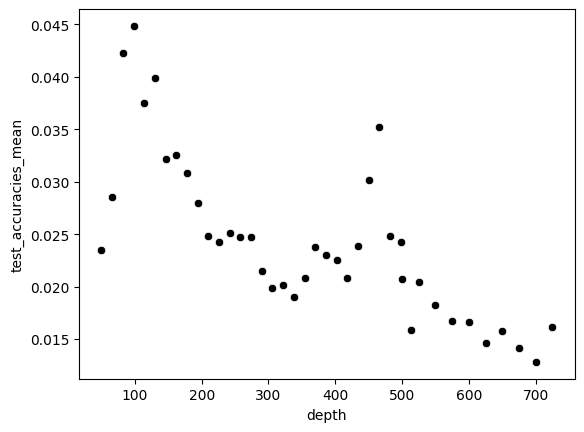

In [7]:
# temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_full') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_windowed') & (all_results_df['decode_dim'] == 'direction')]
temp_df = all_results_df[(all_results_df['stim_type'] == 'natural_images') & (all_results_df['decode_dim'] == 'image_index')]

temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()


sns.scatterplot(data=temp_df_avged, x='depth', y='test_accuracies_mean', color='black')
# temp_df
temp_df_avged

/tmp/ipykernel_2154643/4090836483.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()


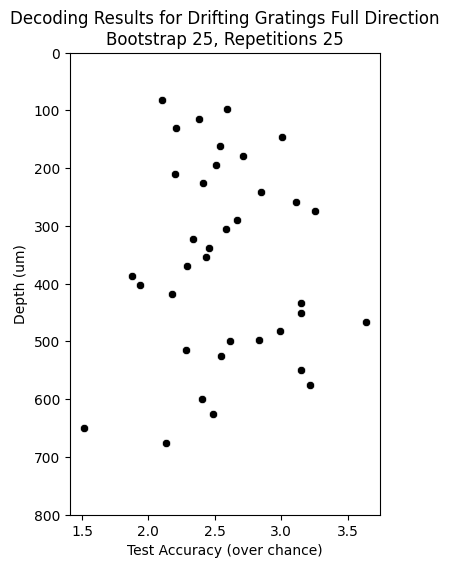

In [8]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_3"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot25_Rep25')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)

temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_full') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_windowed') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'natural_images') & (all_results_df['decode_dim'] == 'image_index')]

temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()
temp_df_avged['test_accuracies_mean'] /= (1/12)

fig, ax = plt.subplots(figsize=(4, 6))

sns.scatterplot(data=temp_df_avged, y='depth', x='test_accuracies_mean', color='black', ax=ax)
# sns.scatterplot(data=temp_df_avged, y='depth', x='shuf_test_accuracies_mean', color='red', ax=ax)
ax.set_ylim(0, 800)
ax.invert_yaxis()
ax.set_xlabel('Test Accuracy (over chance)')
ax.set_ylabel('Depth (um)')
ax.set_title('Decoding Results for Drifting Gratings Full Direction\nBootstrap 25, Repetitions 25');
# temp_df
# temp_df_avged

/tmp/ipykernel_2154643/643372577.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()


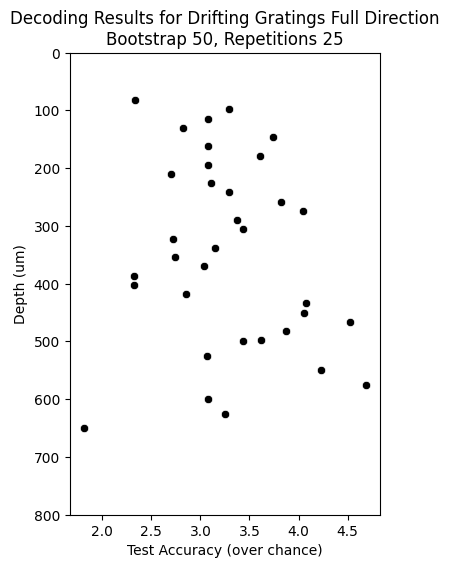

In [9]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_4"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot50_Rep25')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)

temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_full') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_windowed') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'natural_images') & (all_results_df['decode_dim'] == 'image_index')]

temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()
temp_df_avged['test_accuracies_mean'] /= (1/12)

fig, ax = plt.subplots(figsize=(4, 6))

sns.scatterplot(data=temp_df_avged, y='depth', x='test_accuracies_mean', color='black', ax=ax)
# sns.scatterplot(data=temp_df_avged, y='depth', x='shuf_test_accuracies_mean', color='red', ax=ax)

ax.set_ylim(0, 800)
ax.invert_yaxis()
ax.set_xlabel('Test Accuracy (over chance)')
ax.set_ylabel('Depth (um)')
ax.set_title('Decoding Results for Drifting Gratings Full Direction\nBootstrap 50, Repetitions 25');
# temp_df
# temp_df_avged

/tmp/ipykernel_2154643/2740561874.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()


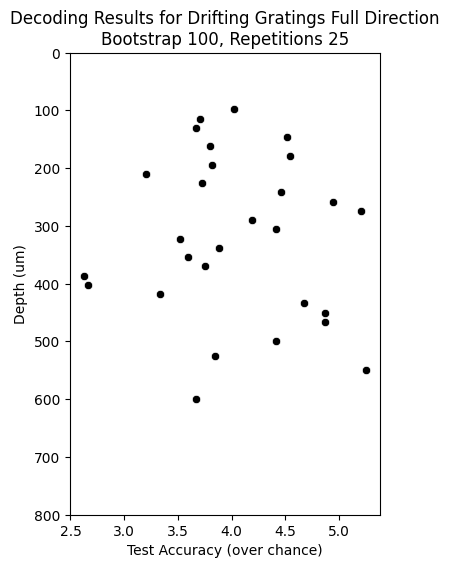

In [10]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_5"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot100_Rep25')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)

temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_full') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_windowed') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'natural_images') & (all_results_df['decode_dim'] == 'image_index')]

temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()
temp_df_avged['test_accuracies_mean'] /= (1/12)

fig, ax = plt.subplots(figsize=(4, 6))

sns.scatterplot(data=temp_df_avged, y='depth', x='test_accuracies_mean', color='black', ax=ax)
ax.set_ylim(0, 800)
ax.invert_yaxis()
ax.set_xlabel('Test Accuracy (over chance)')
ax.set_ylabel('Depth (um)')
ax.set_title('Decoding Results for Drifting Gratings Full Direction\nBootstrap 100, Repetitions 25');
# temp_df
# temp_df_avged

/tmp/ipykernel_2154643/3988039369.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()


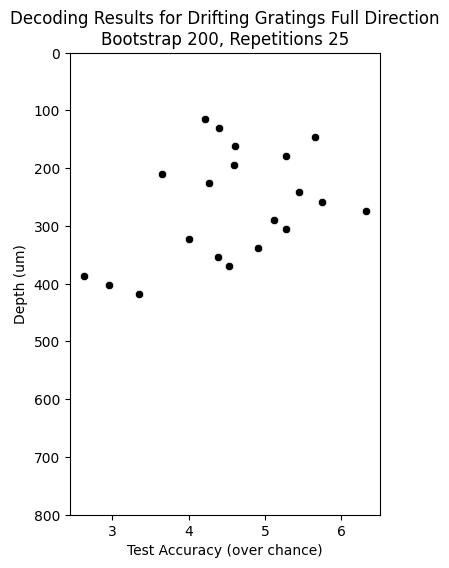

In [11]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_6"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot200_Rep25')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)

temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_full') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_windowed') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'natural_images') & (all_results_df['decode_dim'] == 'image_index')]

temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()
temp_df_avged['test_accuracies_mean'] /= (1/12)

fig, ax = plt.subplots(figsize=(4, 6))

sns.scatterplot(data=temp_df_avged, y='depth', x='test_accuracies_mean', color='black', ax=ax)
ax.set_ylim(0, 800)
ax.invert_yaxis()
ax.set_xlabel('Test Accuracy (over chance)')
ax.set_ylabel('Depth (um)')
ax.set_title('Decoding Results for Drifting Gratings Full Direction\nBootstrap 200, Repetitions 25');
# temp_df
# temp_df_avged

In [12]:
stim_types = [
    "drifting_gratings_full", 
    # "drifting_gratings_windowed", 
    # "natural_images_12", 
    # "natural_images"
    ]
decode_dims = {
    "drifting_gratings_full": ["direction"] #, "spatial"],
    # "drifting_gratings_windowed": ["direction", "spatial"],
    # "natural_images_12": ["image_index"],
    # "natural_images": ["image_index"]
               }

/tmp/ipykernel_2154643/664039677.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()


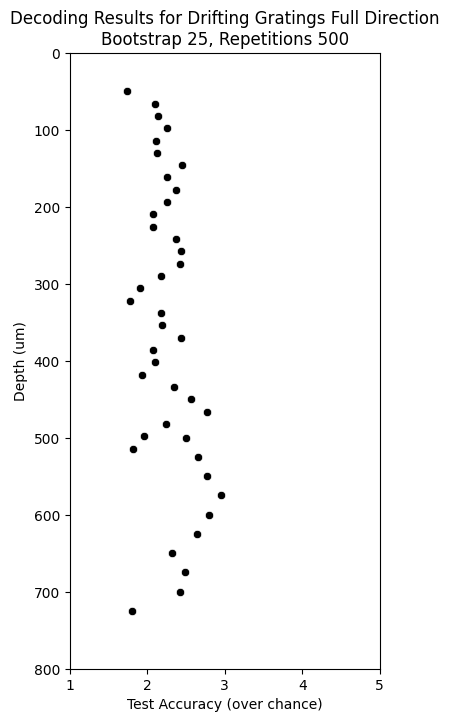

In [13]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_7"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot25_Rep500')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)

temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_full') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_windowed') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'natural_images') & (all_results_df['decode_dim'] == 'image_index')]

temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()
temp_df_avged['test_accuracies_mean'] /= (1/12)

fig, ax = plt.subplots(figsize=(4, 8))

sns.scatterplot(data=temp_df_avged, y='depth', x='test_accuracies_mean', color='black', ax=ax)
# sns.scatterplot(data=temp_df_avged, y='depth', x='shuf_test_accuracies_mean', color='red', ax=ax)
ax.set_xlim(1, 5)
ax.set_ylim(0, 800)
ax.invert_yaxis()
ax.set_xlabel('Test Accuracy (over chance)')
ax.set_ylabel('Depth (um)')
ax.set_title('Decoding Results for Drifting Gratings Full Direction\nBootstrap 25, Repetitions 500');
# temp_df
# temp_df_avged

/tmp/ipykernel_2154643/2365941018.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()


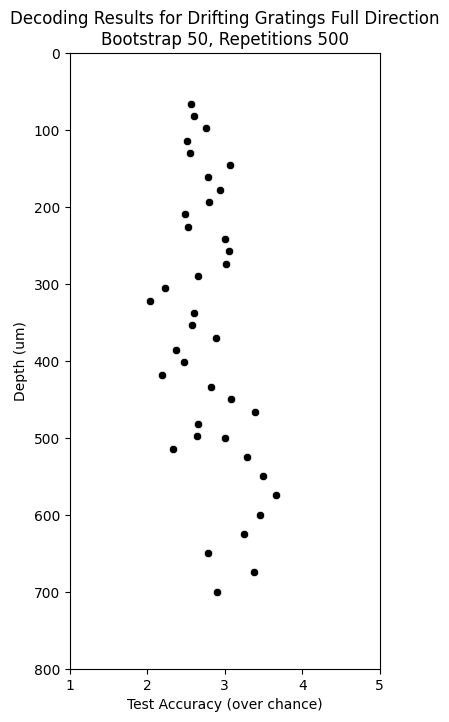

In [14]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_8"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot50_Rep500')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)

temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_full') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_windowed') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'natural_images') & (all_results_df['decode_dim'] == 'image_index')]

temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()
temp_df_avged['test_accuracies_mean'] /= (1/12)

fig, ax = plt.subplots(figsize=(4, 8))

sns.scatterplot(data=temp_df_avged, y='depth', x='test_accuracies_mean', color='black', ax=ax)
# sns.scatterplot(data=temp_df_avged, y='depth', x='shuf_test_accuracies_mean', color='red', ax=ax)
ax.set_xlim(1, 5)
ax.set_ylim(0, 800)
ax.invert_yaxis()
ax.set_xlabel('Test Accuracy (over chance)')
ax.set_ylabel('Depth (um)')
ax.set_title('Decoding Results for Drifting Gratings Full Direction\nBootstrap 50, Repetitions 500');
# temp_df
# temp_df_avged

/tmp/ipykernel_2154643/3237220332.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()


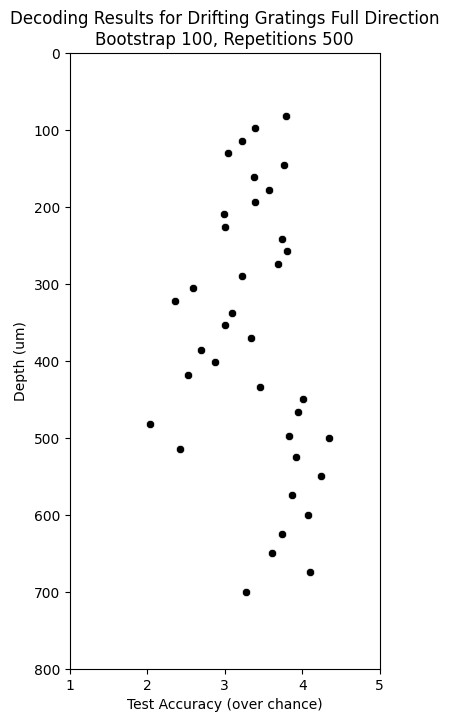

In [15]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_9"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot100_Rep500')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)

temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_full') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_windowed') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'natural_images') & (all_results_df['decode_dim'] == 'image_index')]

temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()
temp_df_avged['test_accuracies_mean'] /= (1/12)

fig, ax = plt.subplots(figsize=(4, 8))

sns.scatterplot(data=temp_df_avged, y='depth', x='test_accuracies_mean', color='black', ax=ax)
ax.set_xlim(1, 5)
# sns.scatterplot(data=temp_df_avged, y='depth', x='shuf_test_accuracies_mean', color='red', ax=ax)
ax.set_ylim(0, 800)
ax.invert_yaxis()
ax.set_xlabel('Test Accuracy (over chance)')
ax.set_ylabel('Depth (um)')
ax.set_title('Decoding Results for Drifting Gratings Full Direction\nBootstrap 100, Repetitions 500');
# temp_df
# temp_df_avged

/tmp/ipykernel_2154643/3268655832.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()


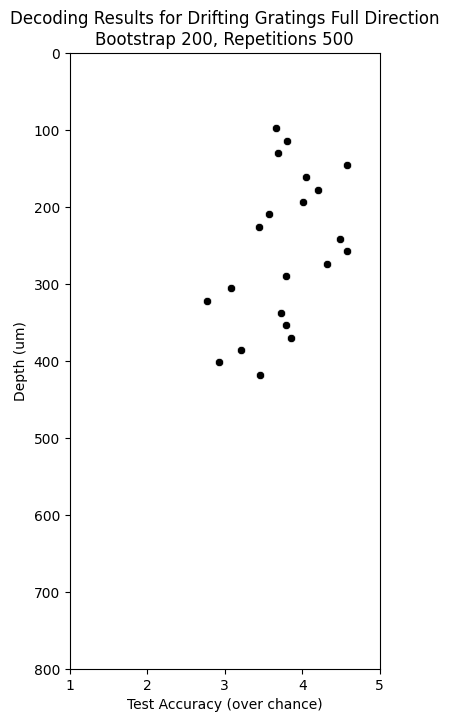

In [16]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_10"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot200_Rep500')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)

temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_full') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'drifting_gratings_windowed') & (all_results_df['decode_dim'] == 'direction')]
# temp_df = all_results_df[(all_results_df['stim_type'] == 'natural_images') & (all_results_df['decode_dim'] == 'image_index')]

temp_df_avged = temp_df.groupby(['depth']).mean().reset_index()
temp_df_avged['test_accuracies_mean'] /= (1/12)

fig, ax = plt.subplots(figsize=(4, 8))

sns.scatterplot(data=temp_df_avged, y='depth', x='test_accuracies_mean', color='black', ax=ax)
# sns.scatterplot(data=temp_df_avged, y='depth', x='shuf_test_accuracies_mean', color='red', ax=ax)
ax.set_xlim(1, 5)
ax.set_ylim(0, 800)
ax.invert_yaxis()
ax.set_xlabel('Test Accuracy (over chance)')
ax.set_ylabel('Depth (um)')
ax.set_title('Decoding Results for Drifting Gratings Full Direction\nBootstrap 200, Repetitions 500');
# temp_df
# temp_df_avged

In [17]:
from scipy.stats import sem

Text(0, 0.5, '')

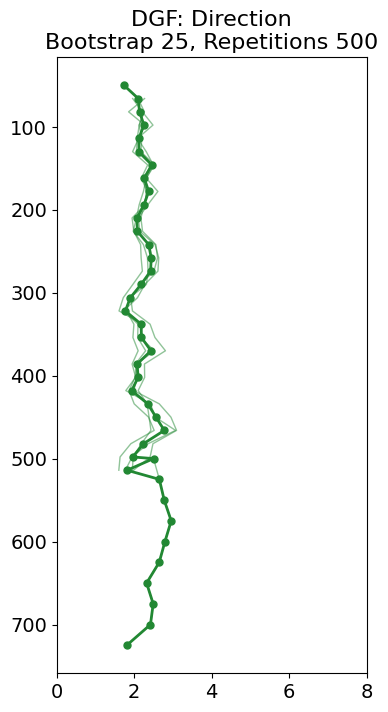

In [18]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_7"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot25_Rep500')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)
sub_results_df = all_results_df[
    (all_results_df['decode_dim'] == "direction") &
    (all_results_df['stim_type'] == "drifting_gratings_full")
    ]

sub_test_results_df = sub_results_df.explode('test_accuracies')
sub_test_results_df['test_accuracies'] = sub_test_results_df['test_accuracies'] / (1/12)
means = []
std_errors = []
y_positions = sub_results_df.depth.unique()
y_positions.sort()

for z in y_positions:
    bootstrapped_values = sub_test_results_df[sub_test_results_df['depth'] == z]['test_accuracies'].values
    mean = np.mean(bootstrapped_values)
    std = sem(bootstrapped_values)
    
    means.append(mean)
    std_errors.append(std)

fig, ax = plt.subplots(figsize=(4, 8))    
ax.errorbar(means, y_positions, xerr=std_errors, fmt='o', color="#228833", ecolor="#228833", capsize=0, markersize=5)
ax.plot(means, y_positions, color="#228833", linewidth=2)


for column in sub_test_results_df.column_id.unique():
    temp_df = sub_test_results_df[sub_test_results_df['column_id'] == column]
    means, std_errors = [], []
    y_positions = temp_df.depth.unique()
    y_positions.sort()

    for z in y_positions:
        bootstrapped_values = temp_df[temp_df['depth'] == z]['test_accuracies'].values
        mean = np.mean(bootstrapped_values)
        std = sem(bootstrapped_values)
        
        means.append(mean)
        std_errors.append(std)
    
    # ax.errorbar(means, y_positions, xerr=std_errors, fmt='o', color="#228833", ecolor="#228833", capsize=0, markersize=5,)
    ax.plot(means, y_positions, color="#228833", linewidth=1, alpha=0.5)

ax.set_title('DGF: Direction\nBootstrap 25, Repetitions 500', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.invert_yaxis()
ax.set_xlim(0, 8)
ax.set_xlabel('')
ax.set_ylabel('')

Text(0, 0.5, '')

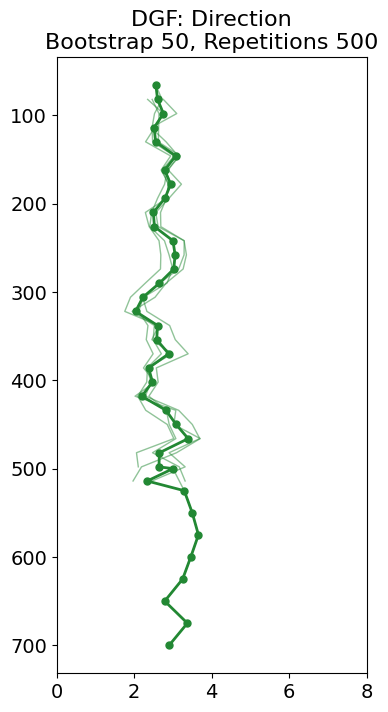

In [19]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_8"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot50_Rep500')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)
sub_results_df = all_results_df[
    (all_results_df['decode_dim'] == "direction") &
    (all_results_df['stim_type'] == "drifting_gratings_full")
    ]

sub_test_results_df = sub_results_df.explode('test_accuracies')
sub_test_results_df['test_accuracies'] = sub_test_results_df['test_accuracies'] / (1/12)
means = []
std_errors = []
y_positions = sub_results_df.depth.unique()
y_positions.sort()

for z in y_positions:
    bootstrapped_values = sub_test_results_df[sub_test_results_df['depth'] == z]['test_accuracies'].values
    mean = np.mean(bootstrapped_values)
    std = sem(bootstrapped_values)
    
    means.append(mean)
    std_errors.append(std)

fig, ax = plt.subplots(figsize=(4, 8))    
ax.errorbar(means, y_positions, xerr=std_errors, fmt='o', color="#228833", ecolor="#228833", capsize=0, markersize=5)
ax.plot(means, y_positions, color="#228833", linewidth=2)


for column in sub_test_results_df.column_id.unique():
    temp_df = sub_test_results_df[sub_test_results_df['column_id'] == column]
    means, std_errors = [], []
    y_positions = temp_df.depth.unique()
    y_positions.sort()

    for z in y_positions:
        bootstrapped_values = temp_df[temp_df['depth'] == z]['test_accuracies'].values
        mean = np.mean(bootstrapped_values)
        std = sem(bootstrapped_values)
        
        means.append(mean)
        std_errors.append(std)
    
    # ax.errorbar(means, y_positions, xerr=std_errors, fmt='o', color="#228833", ecolor="#228833", capsize=0, markersize=5,)
    ax.plot(means, y_positions, color="#228833", linewidth=1, alpha=0.5)

ax.set_title('DGF: Direction\nBootstrap 50, Repetitions 500', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.invert_yaxis()
ax.set_xlim(0, 8)
ax.set_xlabel('')
ax.set_ylabel('')

Text(0, 0.5, '')

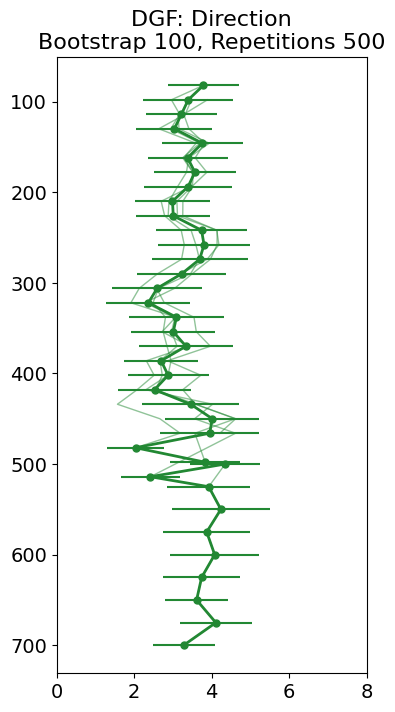

In [20]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_9"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot100_Rep500')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)
sub_results_df = all_results_df[
    (all_results_df['decode_dim'] == "direction") &
    (all_results_df['stim_type'] == "drifting_gratings_full")
    ]

sub_test_results_df = sub_results_df.explode('test_accuracies')
sub_test_results_df['test_accuracies'] = sub_test_results_df['test_accuracies'] / (1/12)
means = []
std_errors = []
y_positions = sub_results_df.depth.unique()
y_positions.sort()

for z in y_positions:
    bootstrapped_values = sub_test_results_df[sub_test_results_df['depth'] == z]['test_accuracies'].values
    mean = np.mean(bootstrapped_values)
    std = np.std(bootstrapped_values)
    
    means.append(mean)
    std_errors.append(std)

fig, ax = plt.subplots(figsize=(4, 8))    
ax.errorbar(means, y_positions, xerr=std_errors, fmt='o', color="#228833", ecolor="#228833", capsize=0, markersize=5)
ax.plot(means, y_positions, color="#228833", linewidth=2)


for column in sub_test_results_df.column_id.unique():
    temp_df = sub_test_results_df[sub_test_results_df['column_id'] == column]
    means, std_errors = [], []
    y_positions = temp_df.depth.unique()
    y_positions.sort()

    for z in y_positions:
        bootstrapped_values = temp_df[temp_df['depth'] == z]['test_accuracies'].values
        mean = np.mean(bootstrapped_values)
        std = np.std(bootstrapped_values)
        
        means.append(mean)
        std_errors.append(std)
    
    # ax.errorbar(means, y_positions, xerr=std_errors, fmt='o', color="#228833", ecolor="#228833", capsize=0, markersize=5,)
    ax.plot(means, y_positions, color="#228833", linewidth=1, alpha=0.5)

ax.set_title('DGF: Direction\nBootstrap 100, Repetitions 500', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.invert_yaxis()
ax.set_xlim(0, 8)
ax.set_xlabel('')
ax.set_ylabel('')

Text(0, 0.5, '')

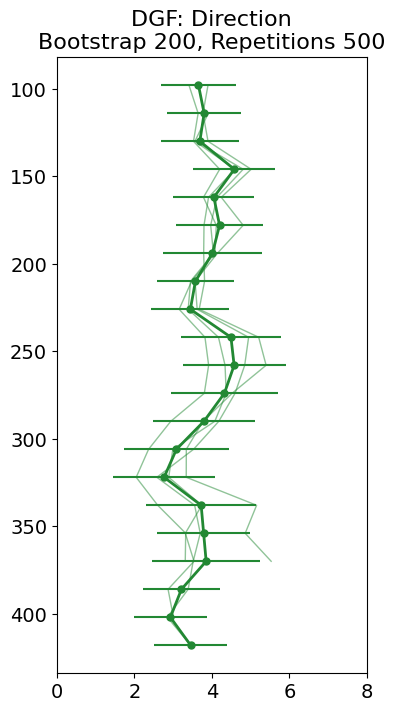

In [21]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_10"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot200_Rep500')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)
sub_results_df = all_results_df[
    (all_results_df['decode_dim'] == "direction") &
    (all_results_df['stim_type'] == "drifting_gratings_full")
    ]

sub_test_results_df = sub_results_df.explode('test_accuracies')
sub_test_results_df['test_accuracies'] = sub_test_results_df['test_accuracies'] / (1/12)
means = []
std_errors = []
y_positions = sub_results_df.depth.unique()
y_positions.sort()

for z in y_positions:
    bootstrapped_values = sub_test_results_df[sub_test_results_df['depth'] == z]['test_accuracies'].values
    mean = np.mean(bootstrapped_values)
    std = np.std(bootstrapped_values)
    
    means.append(mean)
    std_errors.append(std)

fig, ax = plt.subplots(figsize=(4, 8))    
ax.errorbar(means, y_positions, xerr=std_errors, fmt='o', color="#228833", ecolor="#228833", capsize=0, markersize=5)
ax.plot(means, y_positions, color="#228833", linewidth=2)


for column in sub_test_results_df.column_id.unique():
    temp_df = sub_test_results_df[sub_test_results_df['column_id'] == column]
    means, std_errors = [], []
    y_positions = temp_df.depth.unique()
    y_positions.sort()

    for z in y_positions:
        bootstrapped_values = temp_df[temp_df['depth'] == z]['test_accuracies'].values
        mean = np.mean(bootstrapped_values)
        std = np.std(bootstrapped_values)
        
        means.append(mean)
        std_errors.append(std)
    
    # ax.errorbar(means, y_positions, xerr=std_errors, fmt='o', color="#228833", ecolor="#228833", capsize=0, markersize=5,)
    ax.plot(means, y_positions, color="#228833", linewidth=1, alpha=0.5)

ax.set_title('DGF: Direction\nBootstrap 200, Repetitions 500', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.invert_yaxis()
ax.set_xlim(0, 8)
ax.set_xlabel('')
ax.set_ylabel('')

In [84]:
## Set standard plotting parameters
plt.rcParams.update({
    "font.family": "Arial",
    "font.size": 12,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 12,
    "figure.titlesize": 16,
    "lines.linewidth": 2,
    "lines.markersize": 5
})

mouse_colors = {'slc2': "#66CCEE", 'slc4': "#228833", 'slc5': '#CCBB44', 'teto1': '#EE6677'}
mouse_id_colors = {409828: mouse_colors['slc2'],
                  416296: mouse_colors['slc4'],
                  427836: mouse_colors['slc5'],
                  438833: mouse_colors['teto1']}

/tmp/ipykernel_2154643/1429820304.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_test_results_df[sub_test_results_df['mouse_id'] == mouse_id]['depth'] += jitter_values[idx]


Text(0, 0.5, 'Depth (µm)')

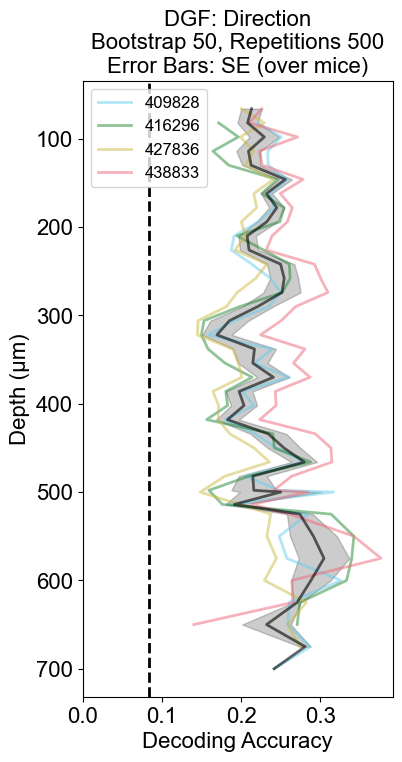

In [86]:
decoding_dir = '/home/naomi/Desktop/data/decoding_results'
tag = "2025_0726_8"
all_results_df = pd.DataFrame()
for stim_type in stim_types:
    stim_decode_dims = decode_dims[stim_type]
    for decode_dim in stim_decode_dims:

        path_name = os.path.join(decoding_dir, f'{tag}_{stim_type}_{decode_dim}_Boot50_Rep500')
        results_df = pd.DataFrame()
        for filename in os.listdir(path_name):
            f = os.path.join(path_name, filename)
            results_df = pd.concat([results_df, pd.read_pickle(f)])
        
        results_df['stim_type'] = stim_type
        results_df['decode_dim'] = decode_dim

        all_results_df = pd.concat([all_results_df, results_df], axis=0)

all_results_df['depth'] = all_results_df.apply(lambda x: depth_volume_mapping_2(volume_id = x['volume_id'], plane = x['plane']), axis=1)
sub_results_df = all_results_df[
    (all_results_df['decode_dim'] == "direction") &
    (all_results_df['stim_type'] == "drifting_gratings_full")
    ]

sub_test_results_df = sub_results_df.explode('test_accuracies')
# sub_test_results_df['test_accuracies'] = sub_test_results_df['test_accuracies'] / (1/12)


# add a bit of jitter to the depths so that the lines don't overlap, for each mouse
jitter_amount = 5
num_elements = len(sub_test_results_df.mouse_id.unique())
jitter_values = np.linspace(-jitter_amount, jitter_amount, num_elements)
for idx, mouse_id in enumerate(sub_test_results_df.mouse_id.unique()):
    sub_test_results_df[sub_test_results_df['mouse_id'] == mouse_id]['depth'] += jitter_values[idx]

fig, ax = plt.subplots(figsize=(4, 8))
sns.lineplot(
    data=sub_test_results_df, 
    x='test_accuracies', 
    y='depth', 
    hue='mouse_id', 
    palette=mouse_id_colors, 
    estimator=np.mean,
    err_style=None,
    # errorbar=(("pi", 50)),
    # legend=None, 
    linewidth=2, 
    alpha=0.5,
    orient='y',
    ax=ax
    )

ax.axvline(x=1/12, color='black', linestyle='--', linewidth=2)

df_group = sub_test_results_df.groupby(['mouse_id', 'depth'])['test_accuracies'].mean().reset_index()

sns.lineplot(
    data=df_group, 
    x='test_accuracies', 
    y='depth', 
    # hue='mouse_id', 
    # palette='tab10', 
    err_style="band",
    estimator=np.mean,
    errorbar=(("se")),
    color='black',
    # legend=None, 
    linewidth=2, 
    alpha=0.6,
    orient='y',
    ax=ax
    )

ax.set_title('DGF: Direction\nBootstrap 50, Repetitions 500\nError Bars: SE (over mice)')
# ax.tick_params(axis='both', which='major')
ax.invert_yaxis()
ax.set_xlim(left=0)
ax.set_xlabel('Decoding Accuracy')
ax.set_ylabel('Depth (µm)')


# ax.set_xlabel('')
# ax.set_ylabel('')

In [79]:
df_group.mouse_id.unique()

array([409828, 416296, 427836, 438833])

/tmp/ipykernel_2154643/2388132010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_test_results_df.loc[sub_test_results_df['mouse_id'] == mouse_id]['depth'] += jitter_values[idx]
